In [1]:
import os
os.chdir('/home/daniel/Documents/Unal/Estadistica/Mineria De Datos/Bases/Alzheimer_s Dataset/Other Images/')

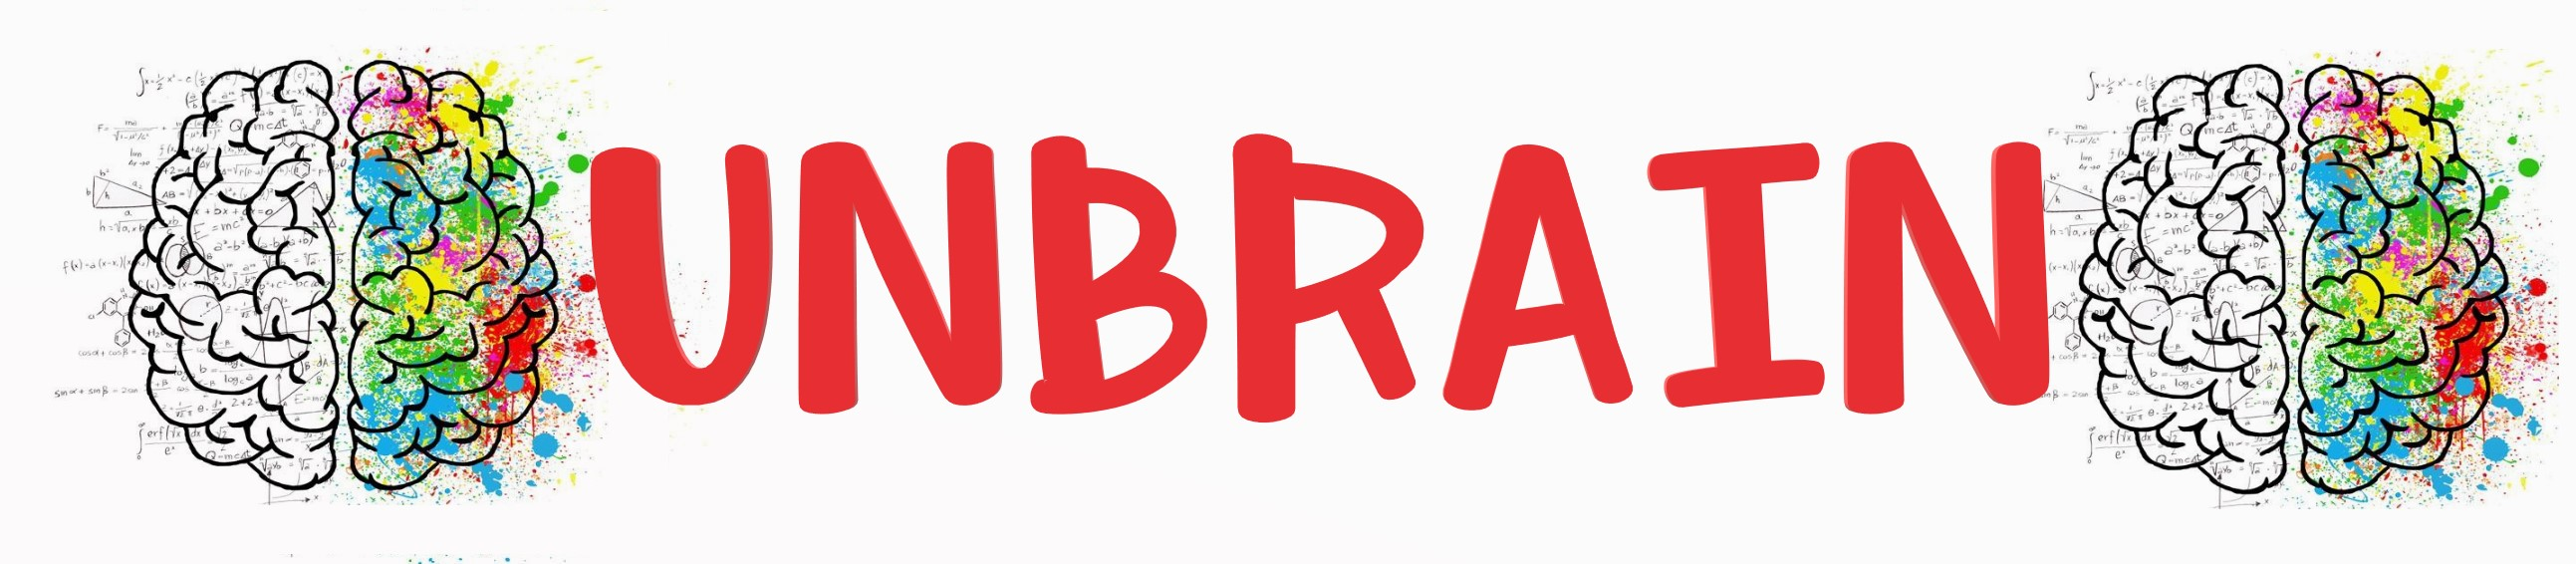

In [2]:
from IPython.display import Image
Image(filename="UNBRAIN.jpg")

# <H1 align="center"> **PROYECTO MINERIA DE DATOS**


# <H1 align="center"> UNIVERSIDAD NACIONAL DE COLOMBIA 
# <H1 align="center"> SEDE BOGOTÁ
# <H1 align="center">DEPARTAMENTO DE ESTADISTICA

#### **Presentado por:**
* Luisa Fernanda Guantiva Vargas (lfguantivav@unal.edu.co)
* Daniel Alejandro Gonzales Salamanca (daagonzalezsa@unal.edu.co)

Nuestro proyecto UNBRAIN se apoya fundamentalmente de una base de imágenes de radiografías cerebrales, de la pagina Kaggle que pueden ser descargadas descargar en el este <a href="https://www.kaggle.com/tourist55/alzheimers-dataset-4-class-of-images">link</a>.

## **CONCEPTOS PREVIOS**
##### ¿LA DEMENCIA Y EL ALZHEIMER SON LO MISMO?
Los términos "demencia" y "enfermedad de Alzheimer" pueden ser confusos. Muchas personas creen que son sinónimos, pero las dos palabras significan cosas diferentes.
La demencia es un término general para una disminución de la capacidad mental lo suficientemente grave como para interferir con la vida diaria. La enfermedad de Alzheimer es la causa más común de demencia. La enfermedad de Alzheimer es una enfermedad específica. La demencia no lo es.
Existen muchos tipos diferentes de demencia, y muchas condiciones lo causan. La enfermedad de Alzheimer representa del 60 al 80 por ciento de los casos de demencia.
#### **EL CEREBRO**
Su cerebro es el órgano más poderoso del cuerpo, pero sólo pesa alrededor de tres libras. Su textura parece jalea dura y tiene tres partes principales:













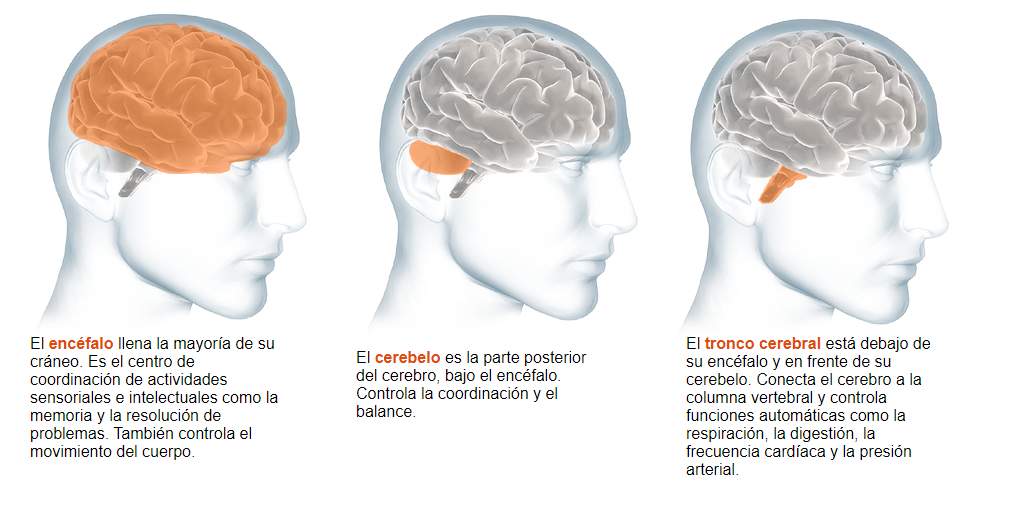

In [3]:
Image(filename="cerebro.png")

#### **NEURONAS** 

El trabajo real de su cerebro está llevado a cabo por células individuales. El cerebro de un adulto contiene alrededor de 100 billones de neuronas, con ramas que se conectan en más de 100 trillones de puntos. Los científicos le pusieron el nombre de "bosque de neuronas" a esta red densa y expandida.

Las señales que pasan por el bosque de neuronas forman la base de los recuerdos, los pensamientos y los sentimientos.

Las neuronas se conectan de una a otra por medio de sinapsis. Cuando una carga eléctrica llega a la sinapsis, puede provocar la transmisión de minúsculos impulsos químicos llamados neurorreguladores. Los neurorreguladores son transmitidos a través de la sinapsis, llevando señales a otras células. Los científicos han identificado docenas de neurorreguladores.

La enfermedad de Alzheimer interrumpe no solamente la manera en que las cargas eléctricas viajan entre las células sino también la actividad de los neurorreguladores y por ende las neuronas.



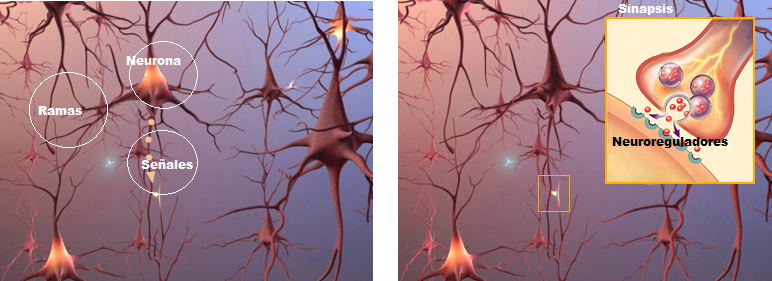

In [4]:
Image(filename="RED NEURONAL.png")

##### **CEREBRO SANO VS CEREBRO CON ALZHEIMER**

La enfermedad de Alzheimer causa la muerte de neuronas y la pérdida de tejido en todo el cerebro. Con el tiempo, el cerebro se encoge dramáticamente, afectando casi todas sus funciones.
En el cerebro de la persona con Alzheimer:

* La corteza se encoge, dañando las áreas del cerebro usadas para pensar, planear y recordar.
* El encogimiento es especialmente severo en el hipocampo, un área de la corteza que juega un papel clave en la formación de nuevos recuerdos.
* Los ventrículos (espacios llenos de líquido dentro del cerebro) se vuelven más grandes.

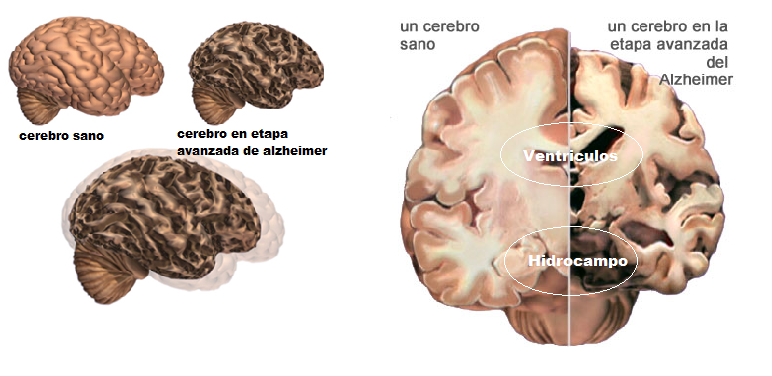

In [5]:
Image(filename="SANO VS ENFERMO.png")

##### **MUERTE DE CELULAS NEURONALES**
Los científicos no están completamente seguros de lo que causa la muerte de células y la pérdida de tejido en el cerebro con Alzheimer, pero las primeros sospechosos son las placas y las marañas.
Las placas se forman cuando pedazos de la proteína llamada beta-amiloidea se agrupan. La beta-amiloidea viene de una proteína más grande que se encuentra en la membrana grasosa que rodea las neuronas.

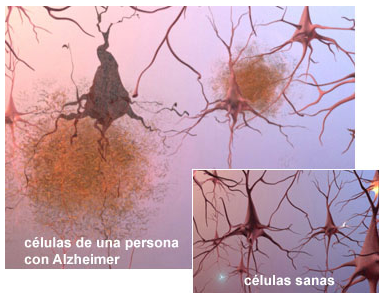

In [6]:
Image(filename="PLACA.png")

Nuestro proyecto pretende a través de  redes convolucionales enseñar a la maquina a predecir con imagenes de resonancias magneticas que tipo de demencia puede tener una persona, para asi poder predecir tempranamente cuando una persona puede padecer esta enfermedad. 

Utilizamos una base de datos que puede ser consultada en el siguiente enlace [texto del enlace](https://www.kaggle.com/tourist55/alzheimers-dataset-4-class-of-images) para poder descargar la base de datos y compilar el codigo



# **Creación del modelo e implementación en Python** 

## **Carga de imagenes y librerias**
Primero que todo, antes de empezar a trabajar en la formación e implementación de nuestro modelo, procederemos a cargar las imágenes. Para ello subimos las imágenes a *google drive* y desde allí las cargaremos para posteriormente utilizarlas. Cabe aclarar que existen métodos para enlazar de forma directa la base de datos desde kaggle.


### **Importamos las librerias**
Para la implementación del modelo, necesitaremos algunas librerías para usar funciones de ellas, por lo tanto lo que hacemos en el siguiente código es cargar las librerías necesarias.

In [7]:
import numpy as np
import os
import re
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import tensorflow as tf
from skimage import data
from skimage.color import rgb2gray


El siguiente código permite cambiar la ruta del directorio de donde estamos trabajando, hacemos esto con el fin de facilitar la importación de las imágenes.

In [8]:
os.chdir('/home/daniel/Documents/Unal/Estadistica/Mineria De Datos/Bases/Alzheimer_s Dataset')

A continuación presentamos algunas imágenes que se encuentran en la base de datos a trabajar:

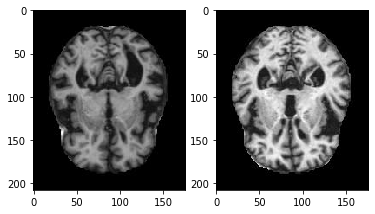

In [9]:
p0 = Image.open('Data/MildDemented/mildDem0.jpg')
p1 = Image.open('Data/MildDemented/mildDem1.jpg')
fig, ax = plt.subplots(1,2)
ax[0].imshow(p0, cmap = plt.cm.gray)
ax[1].imshow(p1, cmap = plt.cm.gray)
plt.show()

Ya con el directorio definido donde se encuentran la imágenes, procedemos a importarlas para trabajar con ellas, por lo que el siguiente comando nos permite cargarlas. Cabe aclarar que la base de datos utilizada está organizada en cuatro distintas carpetas, donde en cada carpeta se encuentra ciertas cantidades de imágenes por cada uno de los diferentes tipos de demencia.

In [10]:
dirname = os.path.join(os.getcwd(), 'Data')
imgpath = dirname + os.sep 
 
images = []
directories = []
dircount = []
prevRoot=''
cant=0
 
print("leyendo imagenes de ",imgpath)
 
for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)
 
dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  /home/daniel/Documents/Unal/Estadistica/Mineria De Datos/Bases/Alzheimer_s Dataset/Data/
/home/daniel/Documents/Unal/Estadistica/Mineria De Datos/Bases/Alzheimer_s Dataset/Data/NonDemented
/home/daniel/Documents/Unal/Estadistica/Mineria De Datos/Bases/Alzheimer_s Dataset/Data/MildDemented
/home/daniel/Documents/Unal/Estadistica/Mineria De Datos/Bases/Alzheimer_s Dataset/Data/VeryMildDemented
/home/daniel/Documents/Unal/Estadistica/Mineria De Datos/Bases/Alzheimer_s Dataset/Data/ModerateDemented
Directorios leidos: 4
Imagenes en cada directorio [2561, 717, 1792, 51]
Total de imagenes en subdirs: 5121


## **Creación de etiquetas o Labels**
Ya habiendo cargado las imágenes a utilizar, procedemos a asignarles a cada una de ellas una etiqueta que identifique a qué tipo de demencia pertenece, para ello utilizamos el siguiente código, donde creamos cuatro etiquetas, una para cada tipo de demencia, y como las imágenes se encuentran en su carpeta, facilitará la asignación de estas etiquetas.

In [11]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))
 
Demencia=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    Demencia.append(name[len(name)-1])
    indice=indice+1
 
Y_datos = np.array(labels)
X_datos = np.array(images, dtype=np.uint8) 

classes = np.unique(Y_datos)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Cantidad etiquetas creadas:  5121
0 NonDemented
1 MildDemented
2 VeryMildDemented
3 ModerateDemented
Total number of outputs :  4
Output classes :  [0 1 2 3]


### **Tamaño de los datos**
El siguente código nos permite determinar con cuantas imágenes tenemos para trabajar, junto con el tamaño de las imágenes. Como son imágenes de radiografías del cerebro, son a blanco y negro, por lo que solo cuentan con dos dimensiones. 


In [12]:
print('Tamaño de los datos', X_datos.shape, Y_datos.shape)

Tamaño de los datos (5121, 208, 176) (5121,)


Para trabajar con las imágenes, lo que procede a continuación es convertir cada arreglo matricial en un formato en el que cada número sea un racional y no un entero.

In [13]:
X_datos = X_datos.astype('float32')
print(X_datos.max())

255.0


Finalmente dividimos cada arreglo en 255 para que los valores de cada arreglo matricial se encuentren entre cero y uno.

In [14]:
X_datos = X_datos/255

In [15]:
print(X_datos.max())

1.0


## **Creación de sets de entrenamiento y test**
A continuación tomamos una muestra aleatoria para seleccionar las imágenes que van a sevir para entrenar a nuestro modelo. En total se toman aproximadamente el 80% de las imágenes de la base de dato, el resto de imágenes, es decir, el 20% restante, van a servir como imágenes de validación para el modelo que posteriormente definiremos.

In [16]:
Index = np.random.choice(X_datos.shape[0],replace=False,size=int(np.floor(X_datos.shape[0]*0.8)))
X_entrenamiento = X_datos[Index]
Y_entrenamiento = Y_datos[Index]
X_validacion = X_datos[-Index]
Y_validacion = Y_datos[-Index]

## **Creación del modelo**
A continuación realizamos la creación del modelo, para ello nos basaremos en la librería **TensorFlow** y en el módulo **keras**. 


In [17]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(208, 176, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(4, activation='softmax')
])

Utilizaremos una función que nos permite ir almacenando la función de pérdida y parecisión del modelo, tanto para los datos de entrenamiento, como para los datos de validación, con esto, más adelante se relazarán gráficos que nos permita visualizar el comportamiento de estas funciones.

In [18]:
checkpoint_dir = './training_checkpoints_radiograpy'

checkpoint_prefix = os.path.join(checkpoint_dir, "radiographies_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True, 
    monitor='val_accuracy', mode='max',
    save_best_only=True)

Finalmente compilamos el modelo con el siguiente código, de esta manera queda listo para el entrenamiento.

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## **Entrenamiento del modelo**
Ya habiendo definido el modelo a utilizar, procedemos a entrenar el modelo con la imágenes que tomamos de forma aleatoria para este fin. Para ello utilizaremos un total de 6 épocas para entrenar el modelo.

In [20]:
X_entrenamiento = X_entrenamiento.reshape(Index.shape[0], 208, 176, 1)
history = model.fit(X_entrenamiento, Y_entrenamiento, epochs=8, validation_split=0.2, batch_size=64,callbacks=[checkpoint_callback])

Epoch 1/8
52/52 [==============================] - 58s 1s/step - loss: 1.6503 - accuracy: 0.5321 - val_loss: 0.8258 - val_accuracy: 0.6268
Epoch 2/8
52/52 [==============================] - 48s 923ms/step - loss: 0.7502 - accuracy: 0.6642 - val_loss: 0.7810 - val_accuracy: 0.6244
Epoch 3/8
52/52 [==============================] - 58s 1s/step - loss: 0.4816 - accuracy: 0.8242 - val_loss: 0.5583 - val_accuracy: 0.7220
Epoch 4/8
52/52 [==============================] - 57s 1s/step - loss: 0.2846 - accuracy: 0.9185 - val_loss: 0.4774 - val_accuracy: 0.7976
Epoch 5/8
52/52 [==============================] - 58s 1s/step - loss: 0.1535 - accuracy: 0.9695 - val_loss: 0.2838 - val_accuracy: 0.9012
Epoch 6/8
52/52 [==============================] - 61s 1s/step - loss: 0.0823 - accuracy: 0.9899 - val_loss: 0.2187 - val_accuracy: 0.9341
Epoch 7/8
52/52 [==============================] - 55s 1s/step - loss: 0.0518 - accuracy: 0.9960 - val_loss: 0.1686 - val_accuracy: 0.9402
Epoch 8/8
52/52 [=======

## **Validación del Modelo**
Ya que hemos entrenado el modelo para clasificar las imágenes en algún tipo de demencia, procedemos a validar el modelo. Para ello utilizaremos el conjunto de datos de l 20\% que tomamos aleatoriamente para verificar que esté clasificando de forma correcta.




In [21]:
X_validacion = X_validacion.reshape(X_validacion.shape[0], 208, 176,1)
model.evaluate(X_validacion,Y_validacion)

128/128 [==============================] - 15s 113ms/step - loss: 0.0497 - accuracy: 0.9888


[0.04971853643655777, 0.98876953125]

A continuación presentamos los gráficos para las funciones de Precisión, junto con la función de pérdida, tanto para los datos de entrenamiento, como los datos de validación

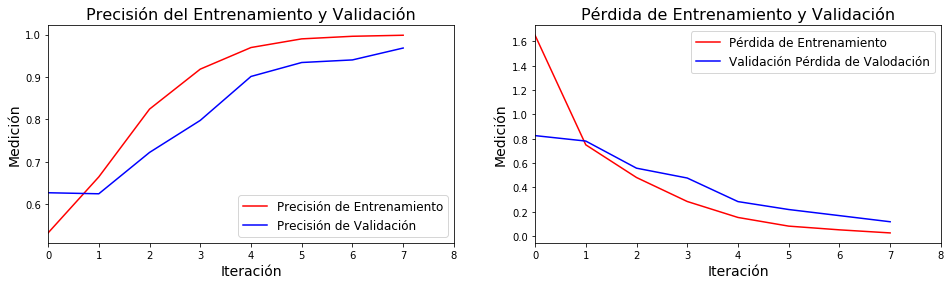

In [22]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

n_row = 1
n_col = 2
fig, ax = plt.subplots(n_row, n_col, sharex = False, sharey = False, figsize=(16,4))


ax[0].plot(epochs, acc, 'r', label='Precisión de Entrenamiento')
ax[0].plot(epochs, val_acc, 'b', label='Precisión de Validación')
ax[0].legend(fontsize=12,loc=0)
ax[0].set_title('Precisión del Entrenamiento y Validación',fontsize=16)
ax[0].set_ylabel('Medición',fontsize=14)
ax[0].set_xlabel('Iteración', fontsize = 14)
ax[0].set_xlim([0, len(acc)])

ax[1].plot(epochs, loss, 'r', label='Pérdida de Entrenamiento')
ax[1].plot(epochs, val_loss, 'b', label='Validación Pérdida de Valodación')
ax[1].legend(fontsize=12)
ax[1].set_title('Pérdida de Entrenamiento y Validación',fontsize=16)
ax[1].set_ylabel('Medición',fontsize=14)
ax[1].set_xlabel('Iteración', fontsize = 14)
ax[1].set_xlim([0, len(acc)])


plt.show()

## **Función de Predicción**
A continuación realizamos una función de predicción para que al ingresar nuevas imágenes nos prediga si presenta o no demencia, y si es así, que nos diga que tipo de demencia se presenta:

In [23]:
def predictions(Imagen):
  ImagenArray = np.array(Image.open(Imagen))/255
  ImagenArray = rgb2gray(ImagenArray)
  ImagenArray = ImagenArray.reshape(1,208,176,1)
  if model.predict_classes(ImagenArray)==0:
    print('NonDemented')
  elif model.predict_classes(ImagenArray)==1:
    print('ModerateDemented')
  elif model.predict_classes(ImagenArray)==2:
    print('MildDemented')
  else:
    print('VeryMildDemented')


Finalmente para probar el modelo tomamos imágenes del siguiente link, y procedemos a realizar su estimación:

In [26]:
predictions('/home/daniel/Documents/Unal/Estadistica/Mineria De Datos/Bases/Alzheimer_s Dataset/Other Images/Cerebro1.jpeg')
predictions('/home/daniel/Documents/Unal/Estadistica/Mineria De Datos/Bases/Alzheimer_s Dataset/Other Images/Cerebro2.jpeg')
predictions('/home/daniel/Documents/Unal/Estadistica/Mineria De Datos/Bases/Alzheimer_s Dataset/Other Images/Cerebro3.jpeg')

NonDemented
NonDemented
ModerateDemented


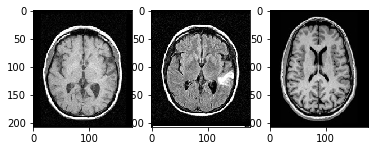

In [25]:
p0 = Image.open('/home/daniel/Documents/Unal/Estadistica/Mineria De Datos/Bases/Alzheimer_s Dataset/Other Images/Cerebro1.jpeg')
p1 = Image.open('/home/daniel/Documents/Unal/Estadistica/Mineria De Datos/Bases/Alzheimer_s Dataset/Other Images/Cerebro2.jpeg')
p2 = Image.open('/home/daniel/Documents/Unal/Estadistica/Mineria De Datos/Bases/Alzheimer_s Dataset/Other Images/Cerebro3.jpeg')
fig, ax = plt.subplots(1,3)
ax[0].imshow(p0, cmap = plt.cm.gray)
ax[1].imshow(p1, cmap = plt.cm.gray)
ax[2].imshow(p2, cmap = plt.cm.gray)
plt.show()